In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ANALISE DE SENTIMENTO/input/dataset.csv')

In [4]:
data = data[data['Language'] == 'en'].reset_index(drop=True)
data.Language.unique()
data.head(5)

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
2,Rwanda is set to host the headquarters of Unit...,en,positive
3,OOPS. I typed her name incorrectly (today’s br...,en,litigious
4,It sucks for me since I'm focused on the natur...,en,negative


Exploratory Data Analysis


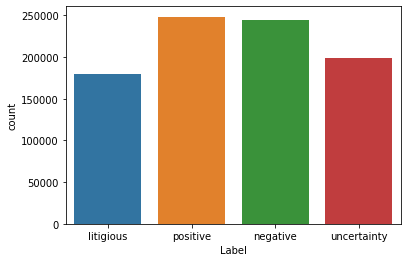

In [5]:
sns.countplot(x= 'Label',data = data)

Cleaning

In [6]:
df = data.copy()

In [ ]:
import re

#lowercasing
df['Clean'] = df.apply(lambda x: x['Text'].lower(), axis=1)

# Remover hashtags e mensões
df['Clean'] = df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Clean']),axis=1)

#removendo links de sites
df['Clean'] = df.apply(lambda row: re.sub(r"https\S+", "", row['Clean']), axis = 1)
df['Clean'] = df.apply(lambda row: re.sub(r"www.\S+","", row['Clean']),axis=1)

#Removing punctuations
df['Clean'] = df.apply(lambda row: re.sub('[()!?]'," ", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub('\[.*?\]'," ", row['Clean']),axis=1)

#Filtering non-alphanumeric characters
df['Clean'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Clean']),axis=1)

In [ ]:
#Filtering non-alphanumeric characters
df['Clean'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Clean']),axis=1)

In [ ]:
df[['Text','Clean']].head(5)

,Text,Clean
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,testimony is not evidence in a court of la...
1,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,flagstar bank discloses a data breach that im...
2,Rwanda is set to host the headquarters of Unit...,rwanda is set to host the headquarters of unit...
3,OOPS. I typed her name incorrectly (today’s br...,oops i typed her name incorrectly today s br...
4,It sucks for me since I'm focused on the natur...,it sucks for me since i m focused on the natur...


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### Dataset Preprocessing
#Stemmeing

"""
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    print(i)

    twitter = df['Clean'][i]

    twitter = twitter.split()
    
    twitter = [ps.stem(word) for word in twitter if not word in stopwords.words('english')]
    twitter = ' '.join(twitter)
    corpus.append(twitter)

"""

In [ ]:
#Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

wnl = WordNetLemmatizer()
corpus_lemme = []
for i in range(0, len(df)):
    print(i)

    twitter = df['Clean'][i]

    twitter = twitter.split()
    
    twitter = [wnl.lemmatize(word,'v') for word in twitter if not word in stopwords.words('english')]
    twitter = ' '.join(twitter)
    corpus_lemme.append(twitter)

In [ ]:
#Salvando o arquivo

#with open('/content/drive/MyDrive/ANALISE DE SENTIMENTO/input/corpus.txt', "w") as opfile:
#    opfile.write("\n".join(corpus))

In [ ]:
#Salvando o arquivo

#with open('/content/drive/MyDrive/ANALISE DE SENTIMENTO/input/corpus_lemme.txt', "w") as opfile:
#    opfile.write("\n".join(corpus_lemme))

In [12]:
#Abrindo o arquivo

with open('/content/drive/MyDrive/ANALISE DE SENTIMENTO/input/corpus_lemme.txt') as f:
    corpus_lemme = f.readlines()
corpus_lemme = [x.rstrip('\n') for x in corpus_lemme] 
len(corpus_lemme)

871310

In [13]:
#Var target y label encode

y = df['Label']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)
#y = np.reshape(y, (-1,1))

In [14]:
verify = pd.DataFrame(y)
verify[0].unique()

array([0, 2, 1, 3])

Label

0 : litigious

1 : negative

2 : positive

3 : uncertainty   

VISUALIZAÇÃO

In [15]:
corpus_lemme[0]

'testimony evidence court law state federal must stand cross examination'

In [16]:
df['corpus'] = corpus_lemme
df['label_encoder'] = y

In [17]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [18]:
all_words_positive = ' '.join(text for text in df['corpus'][df['label_encoder']==2])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

In [20]:
import matplotlib.pyplot as plt

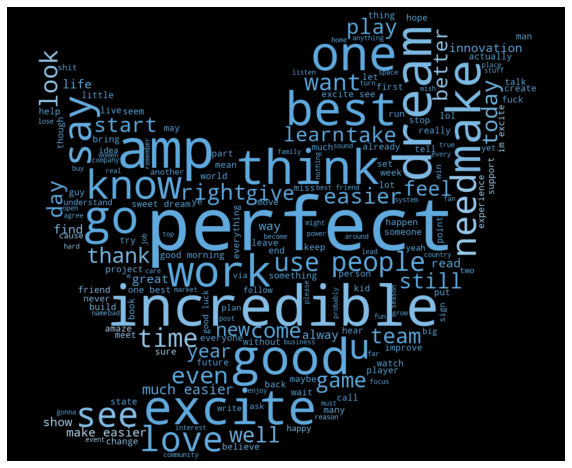

In [21]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()


#Positive

In [22]:
all_words_negative = ' '.join(text for text in df['corpus'][df['label_encoder']==1])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

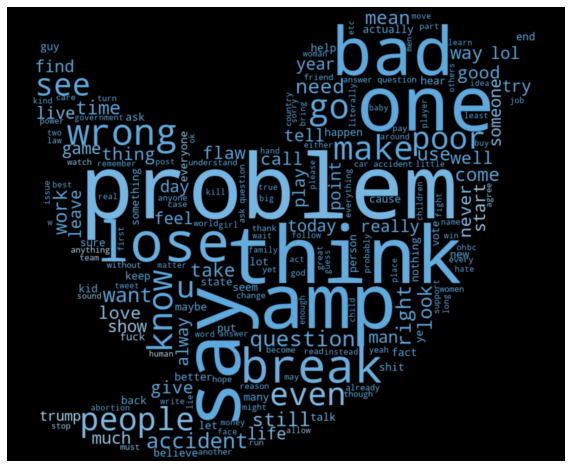

In [23]:
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

#Negative

In [24]:
all_words_litigius = ' '.join(text for text in df['corpus'][df['label_encoder']==0])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_litigius)

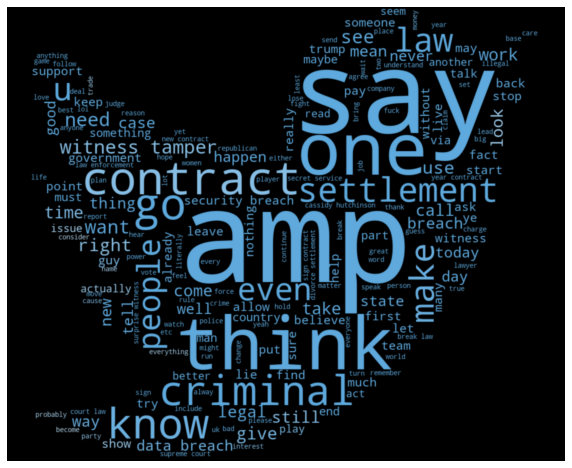

In [25]:
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

#Litigious

In [26]:
all_words_uncertanly = ' '.join(text for text in df['corpus'][df['label_encoder']==3])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_uncertanly)

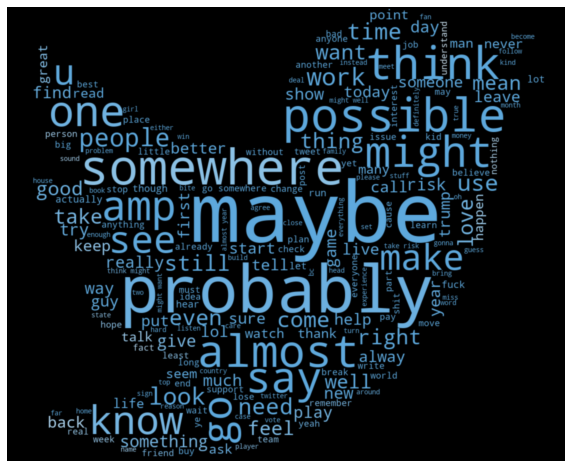

In [27]:
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

#Uncertanity

In [28]:
### Vocabulary size
#vocab_size= 5000     # Only consider the top 5k words
vocab_size = 20000  # Only consider the top 20k words

In [30]:
# one hot representation
onehot_repr=[one_hot(words,vocab_size)for words in corpus_lemme]

Embedding Representation

In [31]:
sent_length=20 ### PREENCHER COM O COMPRIMENTO MAXIMO DAS SEQUENCIAS ###
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ... 14602  7043 11891]
 [    0     0     0 ...   990  4758  5124]
 [    0     0     0 ...  9978  2696  5444]
 ...
 [    0     0     0 ... 12282 16673 13516]
 [    0     0     0 ...     0 14457 15779]
 [    0     0     0 ...     0  7627  5444]]


In [32]:
embedded_docs[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0, 16412,  1638,  4906,  3621, 14299, 11255,  7135, 14602,
        7043, 11891], dtype=int32)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(embedded_docs, y, test_size=0.33, random_state=42)

Implement a Transformer block as a layer

In [34]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

Implement embedding layer

Two seperate embedding layers, one for tokens, one for token index (positions).

In [35]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [36]:
maxlen = 20
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(4, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 token_and_position_embeddin  (None, 20, 32)           640640    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 20, 32)           10656     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 32)                0     

In [38]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)
)

Epoch 1/2
18244/18244 [==============================] - 168s 9ms/step - loss: 0.1764 - accuracy: 0.9361 - val_loss: 0.1485 - val_accuracy: 0.9445
Epoch 2/2
18244/18244 [==============================] - 160s 9ms/step - loss: 0.1445 - accuracy: 0.9479 - val_loss: 0.1469 - val_accuracy: 0.9456


Predição e avaliação do modelo

In [39]:
y_pred1=np.argmax(model.predict(x_val), axis=-1)

8986/8986 [==============================] - 27s 3ms/step


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_pred1)

0.9455923320105866

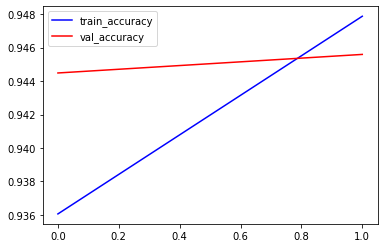

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],'b',label='train_accuracy')
plt.plot(history.history['val_accuracy'],'r',label='val_accuracy')
plt.legend()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c17e7b890>)

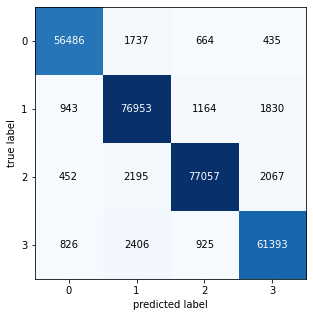

In [42]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm= confusion_matrix(y_val,y_pred1)
plot_confusion_matrix(cm, figsize=(5,5))